<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "g++ set to manually installed."                                 
[6] "0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "make set to manually installed."                                
[6] "0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded."

In [2]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



numDeriv     (NA -> 2016.8-1.1) [CRAN]
matrixStats  (NA -> 1.4.1     ) [CRAN]
distribut... (NA -> 0.5.0     ) [CRAN]
tensorA      (NA -> 0.36.2.1  ) [CRAN]
checkmate    (NA -> 2.3.2     ) [CRAN]
abind        (NA -> 1.4-8     ) [CRAN]
posterior    (NA -> 1.6.0     ) [CRAN]


Installing 7 packages: numDeriv, matrixStats, distributional, tensorA, checkmate, abind, posterior

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpCPE9iO/remotesb287209d96d/stan-dev-cmdstanr-f2e152b/DESCRIPTION’ ... OK
* preparing ‘cmdstanr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘cmdstanr_0.8.1.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.8.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



ERROR: Error: CmdStan path has not been set yet. See ?set_cmdstan_path.


IF YOU ENCOUNTER AN ERROR, JUST KEEP RUNNING CODE BELOW.

In [3]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.35.0

* Installing CmdStan v2.35.0 in /root/.cmdstan/cmdstan-2.35.0

* Downloading cmdstan-2.35.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.o
chmod +x bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.o
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.35.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0

CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0



[1] "2.35.0"

In [4]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’


Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpCPE9iO/remotesb286763c816/rmcelreath-rethinking-ac1b3b2/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.42.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(rethinking)

Loading required package: posterior

This is posterior version 1.6.0


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.42)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [6]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.3381000,0.2225313,-0.6742124,0.03972239,1.0137562,395.2902
b,0.7667092,0.2477227,0.3784798,1.18848425,0.9994306,234.1444


# Chapter 13

## Easy

### 13E1
Which of the following priors will produce more *shrinkage* in the estimates?

> (a) $\alpha_{\text{TANK}} \sim \text{Normal}(0,1)$

> (b) $\alpha_{\text{TANK}} \sim \text{Normal}(0,2)$

#### Answer

"Shrinkage" describes the phenomenon wherein a (non-uniformly distributed) random effect *pulls* estimates closer together--towards the more probable values of the distribution for the random effects.

Intuitively, the more restrictive prior ((a) $\alpha_{\text{TANK}} \sim \text{Normal}(0,1)$) will cause more shrinkage.  Let's look at this by modifying model `m13.2`.

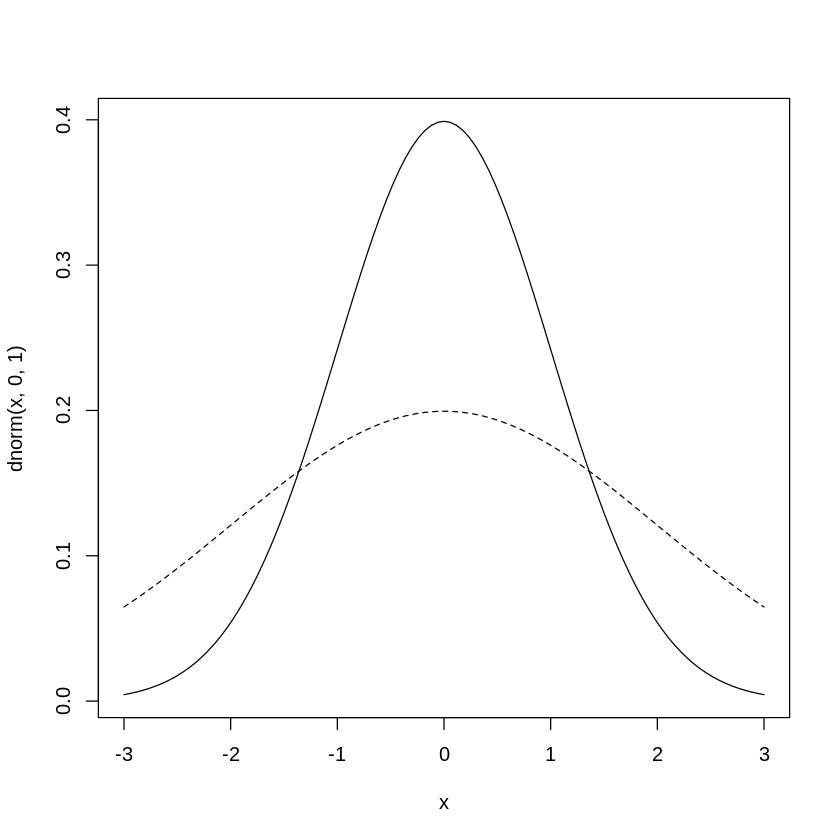

In [ ]:
curve(dnorm(x,0,1), from=-3,to=3)
curve(dnorm(x,0,2), from=-3,to=3, lty=2, add=TRUE)

In [ ]:
data(reedfrogs)
d <- reedfrogs

d$tank <- 1:nrow(d)
dat <- list(S = d$surv,
            N = d$density,
            tank = d$tank)

In [ ]:
m13.2_1 <- ulam(
  alist(
    S ~ dbinom(N, p),
      logit(p) <- a[tank],
        a[tank] ~ dnorm(0,1)
  ), data=dat,
     chains=4,
     log_lik=TRUE)

m13.2_2 <- ulam(
  alist(
    S ~ dbinom(N, p),
      logit(p) <- a[tank],
        a[tank] ~ dnorm(0,2)
  ), data=dat,
     chains=4,
     log_lik=TRUE)

Running MCMC with 4 sequential chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.2 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 5

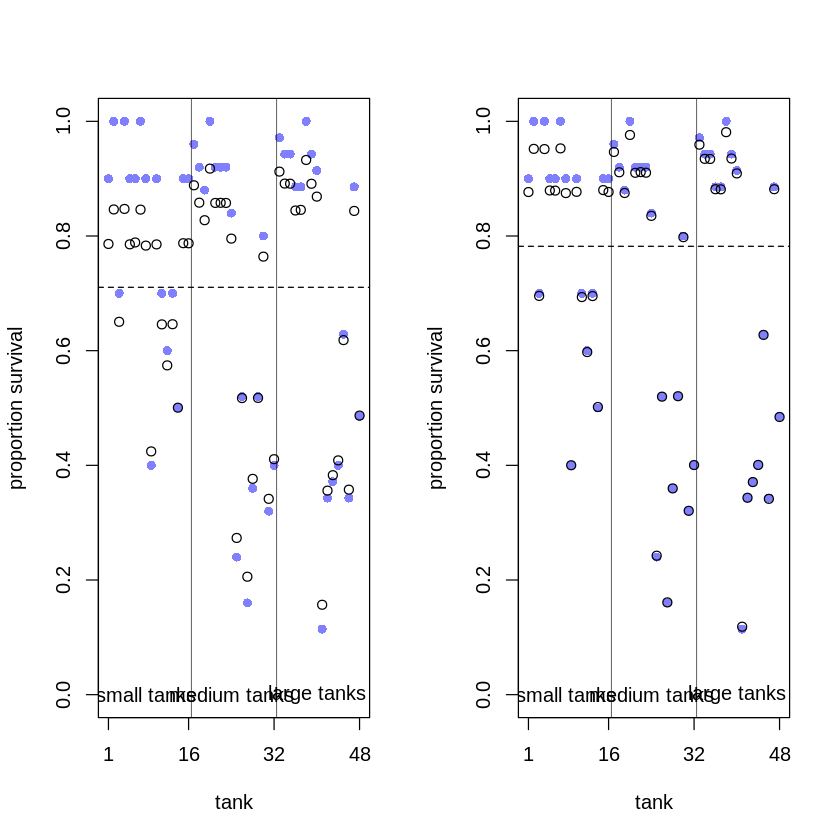

In [ ]:
post_1 <- extract.samples(m13.2_1)
post_2 <- extract.samples(m13.2_2)

par(mfrow=c(1,2))

d$propsurv.est_1 <- logistic(apply(post_1$a, 2, mean))
plot(d$propsurv, ylim=c(0,1), pch=16, xaxt="n",  xlab="tank", ylab="proportion survival", col=rangi2)
axis( 1, at=c(1,16,32,48), labels=c(1,16,32,48))
points( d$propsurv.est_1)
abline(h=inv_logit(mean(colMeans(post_1$a))), lty=2)
abline( v=16.5, lwd=0.5)
abline( v=32.5, lwd=0.5)
text( 8, 0, "small tanks")
text( 16+8, 0, "medium tanks")
text( 32+8, 0, "large tanks")

d$propsurv.est_2 <- logistic(apply(post_2$a, 2, mean))
plot(d$propsurv, ylim=c(0,1), pch=16, xaxt="n",  xlab="tank", ylab="proportion survival", col=rangi2)
axis( 1, at=c(1,16,32,48), labels=c(1,16,32,48))
points( d$propsurv.est_2)
abline(h=inv_logit(mean(colMeans(post_2$a))), lty=2)
abline( v=16.5, lwd=0.5)
abline( v=32.5, lwd=0.5)
text( 8, 0, "small tanks")
text( 16+8, 0, "medium tanks")
text( 32+8, 0, "large tanks")

Remember from the chapter that the blue dots are the actual data and the black circles are hte estimates of the *shrunken* model.  So the shrinkage can be seen by the distance between vertically corresponding blue dots and black circles.

We can also plot the accumulating difference between the empirical data and the shrunk estimates for the two priors, and take this sum.

[1] 2.68537

[1] 0.49449

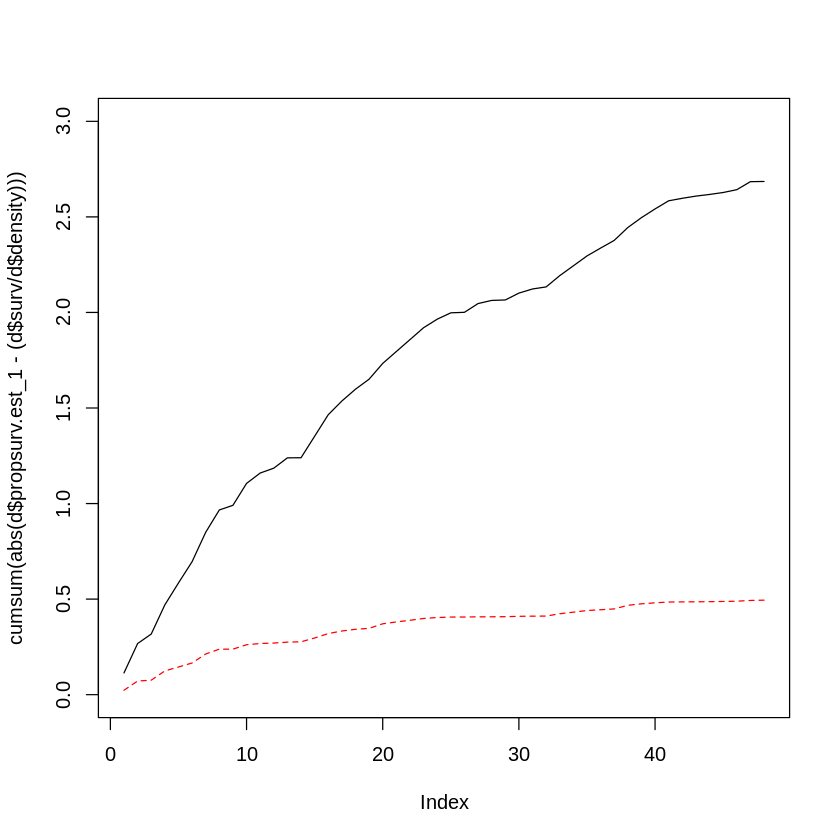

In [ ]:
plot(cumsum(abs(d$propsurv.est_1 - (d$surv/d$density))), type="l", ylim=c(0,3))
lines(cumsum(abs(d$propsurv.est_2 - (d$surv/d$density))), col="red", lty=2)

sum(abs(d$propsurv.est_1 - (d$surv/d$density)))
sum(abs(d$propsurv.est_2 - (d$surv/d$density)))

### 13E2

Rewrite the following model as a multilevel model.

$$y_i \sim \text{Binomial}(1, p_i)$$
$$\text{logit}(p_i) = \alpha_{\text{Group}_i} + \beta x_i$$
$$\alpha_{\text{Group}_i} \sim \text{Normal}(0, 1.5)$$
$$\beta \sim \text{Normal}(0, 0.5)$$

#### Answer
$$y_i \sim \text{Binomial}(1, p_i)$$
$$\text{logit}(p_i) = \alpha_{\text{Group}_i} + \beta x_i$$
$$\alpha_{\text{Group}_i} \sim \text{Normal}(\bar{\alpha}, \sigma_{\alpha})$$
$$\beta \sim \text{Normal}(0, 0.5)$$
$$\bar{\alpha} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha} \sim \text{Exponential}(0.66)$$

Just for kicks, let's look at the prior distribution of the mean for these models.

In [ ]:
dlist <- list("x" = rnorm(n=10, mean=0, sd=1),
              "y" = rbinom(n=10, size=1, prob=0.1 ),
              "group" = c(1,1,1,1,1,2,2,2,2,2))

In [ ]:
m <- ulam(
  alist(
    y ~ dbinom(1, p),
      logit(p) <- a[group] + b*x,
        a[group] ~ dnorm(0, 1.5),
        b ~ dnorm(0, 0.5)
  ), data=dlist, chains=4, cores=4, iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

In [ ]:
mm <- ulam(
  alist(
    y ~ dbinom(1, p),
      logit(p) <- a[group] + b*x,
        a[group] ~ dnorm(abar, sigma_a),
          abar ~ dnorm(0,1),
          sigma_a ~ dexp(0.66),
        b ~ dnorm(0, 0.5)
  ), data=dlist, chains=4, cores=4, iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 

See https://mc-stan.org/misc/warnings for details.




In [ ]:
m_prior <- extract.prior(m)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampli

In [ ]:
mm_prior <- extract.prior(mm)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampli

See https://mc-stan.org/misc/warnings for details.




In [ ]:
xseq <- seq(from=-3, to=3, length.out=100)

m_y1 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
m_y2 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
mm_y1 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
mm_y2 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
for(i in 1:length(xseq)){
  m_y1[,i] <- inv_logit(m_prior$a[,1] + m_prior$b*xseq[i])
  m_y2[,i] <- inv_logit(m_prior$a[,2] + m_prior$b*xseq[i])

  mm_y1[,i] <- inv_logit(mm_prior$a[,1] + mm_prior$b*xseq[i])
  mm_y2[,i] <- inv_logit(mm_prior$a[,2] + mm_prior$b*xseq[i])
}

m_y1_mean <- colMeans(m_y1)
m_y1_PI <- apply(m_y1, 2, PI)
m_y2_mean <- colMeans(m_y2)
m_y2_PI <- apply(m_y2, 2, PI)

mm_y1_mean <- colMeans(mm_y1)
mm_y1_PI <- apply(mm_y1, 2, PI)
mm_y2_mean <- colMeans(mm_y2)
mm_y2_PI <- apply(mm_y2, 2, PI)

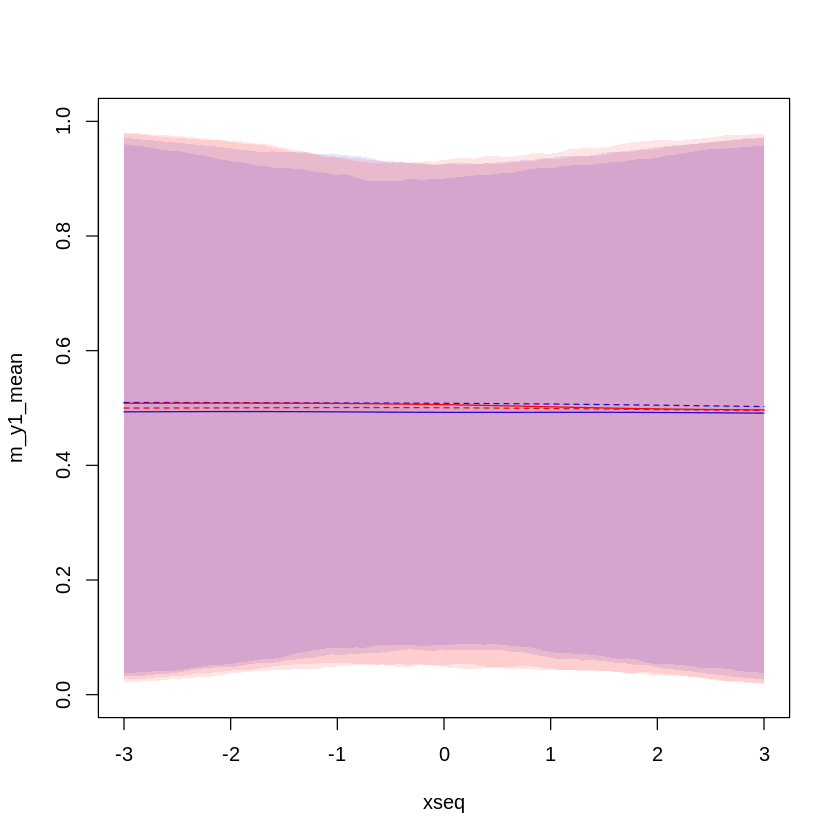

In [ ]:
plot(m_y1_mean ~ xseq, type="l", ylim=c(0, 1), col="blue")
lines(m_y2_mean ~ xseq, lty=2, col="blue")
shade(m_y1_PI, xseq, col=col.alpha("blue", 0.1))
shade(m_y2_PI, xseq, col=col.alpha("blue", 0.1))

lines(mm_y1_mean ~ xseq, col="red")
lines(mm_y2_mean ~ xseq, lty=2, col="red")
shade(mm_y1_PI, xseq, col=col.alpha("red", 0.1))
shade(mm_y2_PI, xseq, col=col.alpha("red", 0.1))

### 13E3

Rewrite the following model as a multilevel model.

$$y_i \sim \text{Normal}(\mu_i, \sigma)$$
$$\mu_i = \alpha_{\text{Group}_i} + \beta x_i$$
$$\alpha_{\text{Group}_i} \sim \text{Normal}(0, 5)$$
$$\beta \sim \text{Normal}(0, 1)$$
$$\sigma \sim \text{Exponential}(1)$$

#### Answer
$$y_i \sim \text{Normal}(\mu_i, \sigma)$$
$$\mu_i = \alpha_{\text{Group}_i} + \beta x_i$$
$$\alpha_{\text{Group}_i} \sim \text{Normal}(\bar{\alpha}, \sigma_{\alpha})$$
$$\beta \sim \text{Normal}(0, 1)$$
$$\bar{\alpha} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha} \sim \text{Exponential}(0.20)$$
$$\sigma \sim  \text{Exponential}(1)$$

Let's again look at the prior distribution of the mean.

In [ ]:
dlist <- list("x" = rnorm(n=10, mean=0, sd=1),
              "y" = rnorm(n=10, mean=1 + 2*x, sd=2),
              "group" = c(1,1,1,1,1,2,2,2,2,2))

In [ ]:
m <- ulam(
  alist(
    y ~ dnorm(mu, sigma),
      mu <- a[group] + b*x,
        a[group] ~ dnorm(0, 5),
        b ~ dnorm(0, 1),
      sigma ~ dexp(1)
  ), data=dlist, chains=4, cores=4, iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

In [ ]:
mm <- ulam(
  alist(
    y ~ dnorm(mu, sigma),
      mu <- a[group] + b*x,
        a[group] ~ dnorm(abar, sigma_a),
          abar ~ dnorm(0,1),
          sigma_a ~ dexp(0.2),
        b ~ dnorm(0, 1),
          sigma_b ~ dexp(1),
      sigma ~ dexp(1)
  ), data=dlist, chains=4, cores=4, iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 

See https://mc-stan.org/misc/warnings for details.




In [ ]:
m_prior <- extract.prior(m)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampli

In [ ]:
mm_prior <- extract.prior(mm)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampli

See https://mc-stan.org/misc/warnings for details.




In [ ]:
xseq <- seq(from=-3, to=3, length.out=100)

m_y1 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
m_y2 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
mm_y1 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
mm_y2 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
for(i in 1:length(xseq)){
  m_y1[,i] <- m_prior$a[,1] + m_prior$b*xseq[i]
  m_y2[,i] <- m_prior$a[,2] + m_prior$b*xseq[i]

  mm_y1[,i] <- mm_prior$a[,1] + mm_prior$b*xseq[i]
  mm_y2[,i] <- mm_prior$a[,2] + mm_prior$b*xseq[i]
}

m_y1_mean <- colMeans(m_y1)
m_y1_PI <- apply(m_y1, 2, PI)
m_y2_mean <- colMeans(m_y2)
m_y2_PI <- apply(m_y2, 2, PI)

mm_y1_mean <- colMeans(mm_y1)
mm_y1_PI <- apply(mm_y1, 2, PI)
mm_y2_mean <- colMeans(mm_y2)
mm_y2_PI <- apply(mm_y2, 2, PI)

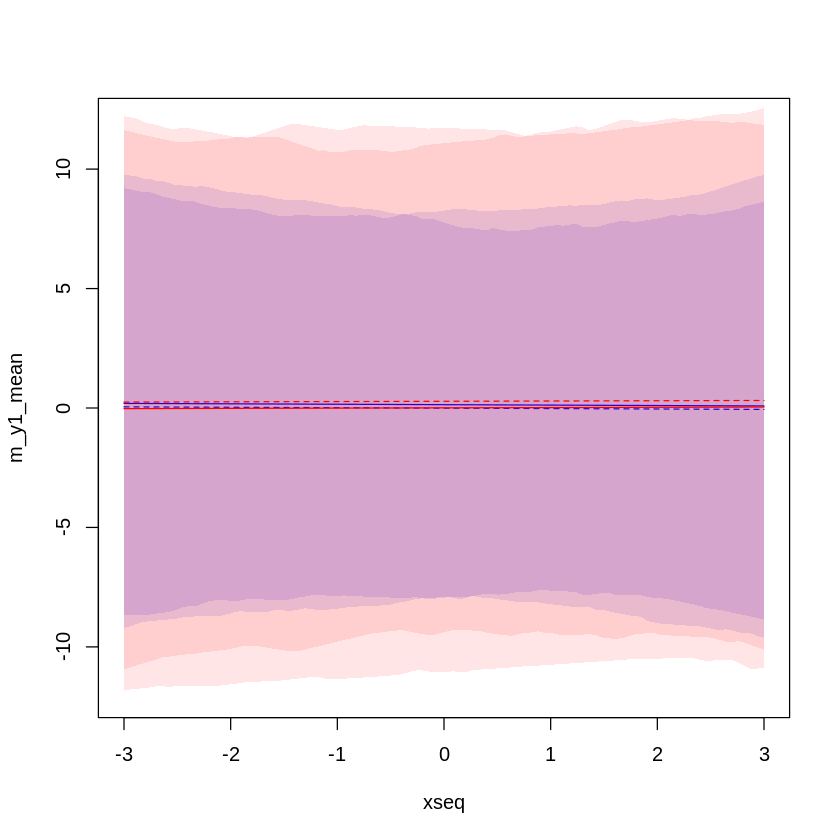

In [ ]:
plot(m_y1_mean ~ xseq, type="l", col="blue", ylim=c(-12,12))
lines(m_y2_mean ~ xseq, lty=2, col="blue")
shade(m_y1_PI, xseq, col=col.alpha("blue", 0.1))
shade(m_y2_PI, xseq, col=col.alpha("blue", 0.1))

lines(mm_y1_mean ~ xseq, col="red")
lines(mm_y2_mean ~ xseq, lty=2, col="red")
shade(mm_y1_PI, xseq, col=col.alpha("red", 0.1))
shade(mm_y2_PI, xseq, col=col.alpha("red", 0.1))

### 12E4

Write a mathematical model formula for Poisson regression with varying intercepts.

#### Answer

I'm just going to alter the model in the answer to 12E2

$$y_i \sim \text{Poisson}(\lambda)$$
$$\log(\lambda) = \alpha_{\text{Group}_i} + \beta x_i$$
$$\alpha_{\text{Group}_i} \sim \text{Normal}(\bar{\alpha}, \sigma_{\alpha})$$
$$\beta \sim \text{Normal}(0, 0.5)$$
$$\bar{\alpha} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha} \sim \text{Exponential}(0.66)$$

### 12E5

Write a mathematical model for a Poisson regression with two different kinds of varying intercepts, a cross-classified model.

#### Answer

Recall from the **Rethinking** box at the beginning of section 13.3, that *cross-classified* models are like hierarchcal models, except the study subjects (e.g., each individual chimp in the `chimpanzees` dataset) are not exclusively nested within unique blocks, but rather distributed among features of the study (e.g., `treatment`).  In other words, we add more varying intercepts.

So let's accomplish this by modifying the model in 12E4.

$$y_i \sim \text{Poisson}(\lambda)$$
$$\log(\lambda) = \alpha_{\text{Group}_i} + \alpha_{\text{Treatment}_i} + \beta x_i$$
$$\alpha_{\text{Group}} \sim \text{Normal}(\bar{\alpha}_{\text{Group}}, \sigma_{\alpha_{\text{Group}}})$$
$$\alpha_{\text{Treatment}} \sim \text{Normal}(\bar{\alpha}_{\text{Treatment}}, \sigma_{\alpha_{\text{Treatment}}})$$
$$\beta \sim \text{Normal}(0, 0.5)$$
$$\bar{\alpha}_{\text{Group}} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha_{\text{Group}}} \sim \text{Exponential}(0.66)$$
$$\bar{\alpha}_{\text{Treatment}} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha_{\text{Treatment}}} \sim \text{Exponential}(0.66)$$

Now, there may be a small problem here: both random intercepts have a prior for the mean parameter.  This idea is not well explored in the book; it is briefly touched on in section 11.1.  Here, I think the problem is that a *baseline* value is a function of multiple inputs (please correct me if I'm wrong).  The author avoids over-parameterization in model `m13.4`: one of the varying-intercept hyperparameter priors is set to 0.  We can avoid overparameterization here by following this example:

$$y_i \sim \text{Poisson}(\lambda)$$
$$\log(\lambda) = \alpha_{\text{Group}_i} + \alpha_{\text{Treatment}_i} + \beta x_i$$
$$\alpha_{\text{Group}} \sim \text{Normal}(\bar{\alpha}_{\text{Group}}, \sigma_{\alpha_{\text{Group}}})$$
$$\alpha_{\text{Treatment}} \sim \text{Normal}(0, \sigma_{\alpha_{\text{Treatment}}})$$
$$\beta \sim \text{Normal}(0, 0.5)$$
$$\bar{\alpha}_{\text{Group}} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha_{\text{Group}}} \sim \text{Exponential}(0.66)$$
$$\sigma_{\alpha_{\text{Treatment}}} \sim \text{Exponential}(0.66)$$

But I find this a little unintuitive; it seems arbitrary to assign a prior of 0 to one varying intercept but not the other.  I think interpretability is improved if we add an overall interept and set both varying intercepts to 0 like:

$$y_i \sim \text{Poisson}(\lambda)$$
$$\log(\lambda) = \alpha + \alpha_{\text{Group}_i} + \alpha_{\text{Treatment}_i} + \beta x_i$$
$$\alpha \sim \text{Normal}(0, 1)$$
$$\alpha_{\text{Group}} \sim \text{Normal}(0, \sigma_{\alpha_{\text{Group}}})$$
$$\alpha_{\text{Treatment}} \sim \text{Normal}(0, \sigma_{\alpha_{\text{Treatment}}})$$
$$\beta \sim \text{Normal}(0, 0.5)$$
$$\sigma_{\alpha_{\text{Group}}} \sim \text{Exponential}(0.66)$$
$$\sigma_{\alpha_{\text{Treatment}}} \sim \text{Exponential}(0.66)$$

Now, at least, we can interpret the varying intercepts as deviations away from a common baseline value.  But what if overparameterization was not a problem here (in fact, model `m11.8` in section 11.1 opts for overparameterization)?  If it doesn't cause a problem, I think I'd like to overparameterize model to aid with interpretation.  For instance, it would be nice to have values for the average affects of both $\alpha_{\text{Group}}$ and $\alpha_{\text{Treatment}}$

Overparameterization IS a problem with many algorithms and in frequentist statistics, but I'm not sure how big of a deal it is with Bayesianism with MCMC.  So let's generate some fake data and test both our over-parameterized and non-over-parameterized models.



